# Zusammenführen annotierter Labels
In diesem Notebook zeigen wir, wie ein Label-Bild nachbearbeitet werden kann, indem Labels annotiert werden, die zusammengeführt werden sollen.

In [1]:
import apoc
from skimage.io import imread, imshow, imsave
import pyclesperanto_prototype as cle
import numpy as np

Unser Ausgangspunkt ist ein übersegmentiertes (synthetisches) Label-Bild.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
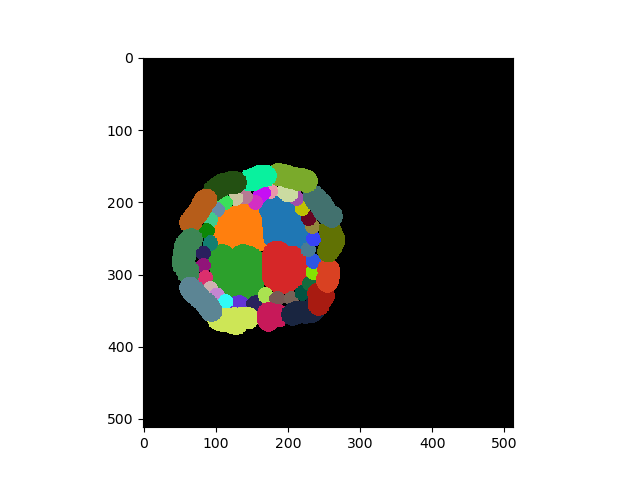

In [2]:
oversegmented = cle.asarray(imread('../../data/syntetic_cells.tif')).astype(np.uint32)
oversegmented

Außerdem benötigen wir eine Annotation, bei der Pixel-Intensität = 1 bedeutet, dass Labels zusammengeführt werden sollen.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
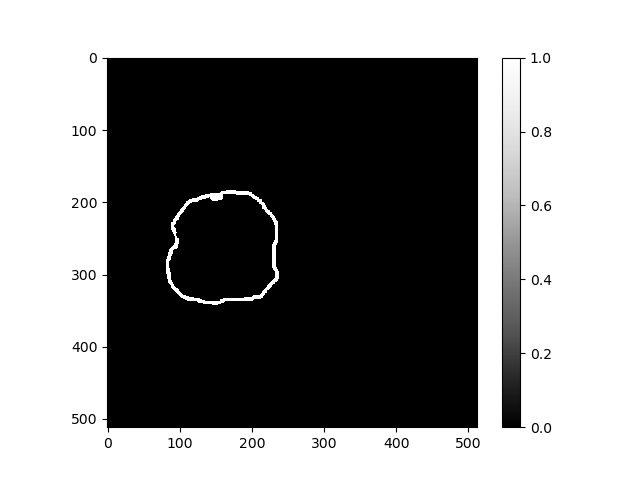
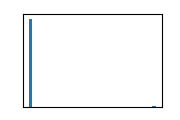

In [3]:
annotation = cle.asarray(imread('../../data/syntetic_cells_merge_annotation.tif')).astype(np.uint32)

# binarize the image
annotation = annotation == 1

annotation

Zu Visualisierungszwecken überlagern wir beide.

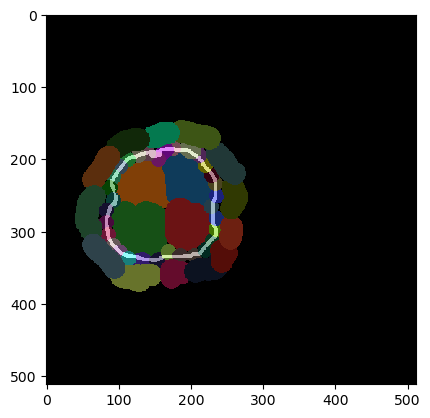

In [4]:
cle.imshow(oversegmented, labels=True, continue_drawing=True)
cle.imshow(annotation, alpha=0.5)

Wir können nun alle Zellen zusammenführen, deren Grenzen annotiert sind.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
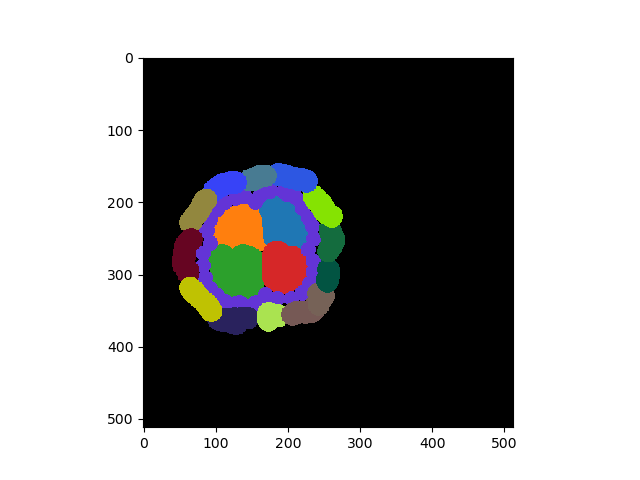

In [5]:
result = cle.merge_annotated_touching_labels(oversegmented, annotation)
result

## Wie funktioniert es?
Im Hintergrund gibt es eine Funktion zur Erzeugung einer Berührungsmatrix aus dem Label-Bild und der Annotation sowie eine Funktion zum Zusammenführen von Labels gemäß einer Berührungsmatrix.

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
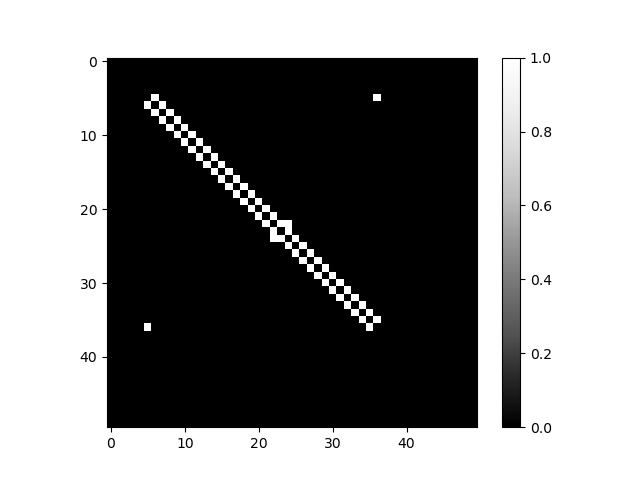
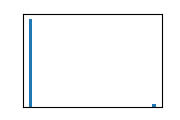

In [6]:
should_touch_matrix = cle.generate_should_touch_matrix(oversegmented, annotation)
should_touch_matrix

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
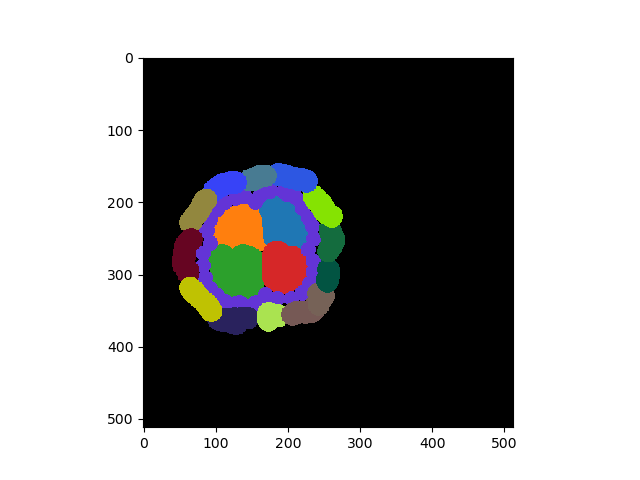

In [7]:
result = cle.merge_labels_according_to_touch_matrix(oversegmented, should_touch_matrix)
result